## Unsupervised Learning Project

1) Go out and find a dataset of interest. 

2) Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

3) You should try several different approaches and really work to tune a variety of models before choosing what you consider to be the best performer.

_Things to keep in mind: how do clustering and modeling compare? What are the advantages of each? Why would you want to use one over the other?_

 **Deliverables:** 
    
 * A Jupyter notebook that tells a compelling story about your data (to be submitted at the end of this checkpoint).
 * A 15 to 30 minute presentation of your findings. You'll need to produce a deck and present it to the Thinkful community.
 * Conduct the analysis in Jupyter. Provide a complete research report using the framework introduced in the previous module. The report should include compelling visualizations and actionable insights, telling the story to your intended audience. Walk through the analysis using clean, reproducible code. Include plenty of notes and comments to guide others through your thinking.
 * Use Jupyter’s built-in slide deck capabilities. This cuts down on the time-consuming and error-prone process of copying-and-pasting into an external program. The presentation is also fully reproducible.
 * On the day of your presentation, an evaluator from the Thinkful educator team will introduce you, and then you'll give your presentation. Afterward, the evaluator will ask you follow up questions and will grade your performance on your presentation. Members of the audience will also be encouraged to ask follow up questions.

Be prepared to talk about:

 * Your end-user and the value your project provides to them.
 * Quantifiable results based on the research you’ve conducted.
 * The visuals you chose and what they represent for your research.
 * Next steps you'd take to expand on your work.
 * A specified research question your model addresses.
 * How you chose your model specification and what alternatives you compared it to.
 * The practical uses of your model for an audience of interest.
 * Any weak points or shortcomings of your model.

# Capstone 3: Unsupervised Learning

## Applying Unsupervised Learning Models to MDM


<b> 

Shafiq Jadallah

Thinkful Data Science

Nov X, 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
import datetime
%matplotlib inline

In [2]:
#Import the dataset

audit=pd.read_csv('/Users/sjadallah/Dropbox/Thinkful_data/Unsupervised Learning/audit_clean_dataset.csv')

audit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116557 entries, 0 to 116556
Data columns (total 45 columns):
Unnamed: 0                          116557 non-null int64
id                                  116557 non-null object
device_id                           116557 non-null object
material_type                       116557 non-null object
package_id                          116557 non-null int64
net_weight                          116557 non-null float64
unit                                116557 non-null object
package_date                        116557 non-null object
create_date                         116557 non-null object
employee_code                       116557 non-null object
img_url                             116557 non-null object
ext_printed                         116557 non-null float64
barcode                             116557 non-null object
gross_weight                        116557 non-null float64
audit_status                        116557 non-null object
aud

In [3]:
#create two arrays separating numeric from non-numeric data

numeric_cols = audit.select_dtypes(include = [np.number]).columns
non_numeric_cols = audit.select_dtypes(include = ['object']).columns

print('Numeric:', len(numeric_cols))
print('Non-numeric:', len(non_numeric_cols))

Numeric: 21
Non-numeric: 24


In [4]:
numeric_cols

Index(['Unnamed: 0', 'package_id', 'net_weight', 'ext_printed', 'gross_weight',
       'audit_reject_reasonid', 'orig_tare_weight', 'orig_net_weight',
       'time_delta', 'standard_weight', 'Material', 'standard_w_avg',
       'standard_w_std', 'mad_weight', 'mad_var', 'weight_var_index',
       'changed_weight', 'label', 'audited', 'image', 'duplicate_counts'],
      dtype='object')

### Supervised Learning: An MLP model

In [5]:
#Now it's time to build some models

# Import the model.
from sklearn.neural_network import MLPClassifier

#Define the X and Y variables
X = audit[['package_id', 'orig_net_weight', 'ext_printed', 
           'gross_weight','Material', 'image', 
           'audit_reject_reasonid', 'label', 'time_delta']]

y = audit['audit_status']

In [6]:
# Establish and fit the model, with a single, 100 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(100,4))
mlp.fit(X, y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [7]:
print('MLP dataset score:', mlp.score(X, y))
y.value_counts()/len(y)

#Meaure the model's performance

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

print('Initial MLP Model cross validation score:', cross_val_score(mlp, X, y, cv=5))

MLP dataset score: 0.9917551069433839
Initial MLP Model cross validation score: [0.99656844 0.99232188 0.97799322 0.9981124  0.99249249]


In [8]:
#Import train/test/split
from sklearn.model_selection import train_test_split

MLP_X_train, MLP_X_test, mlp_y_train, mlp_y_test = train_test_split(X, y, test_size=.3)

mlp_test = MLPClassifier(hidden_layer_sizes=(100,4))
mlp_test.fit(MLP_X_train, mlp_y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [17]:
print('MLP Training dataset score:', mlp_test.score(MLP_X_train, mlp_y_train))
mlp_y_train.value_counts()/len(mlp_y_train)

#Now use the model to predict

mlp_pred = mlp_test.predict(MLP_X_test)
#print('MLP Model predicted scores on trained data:', cross_val_score(mlp_pred, MLP_X_test, mlp_y_test, cv=5))

MLP Training dataset score: 0.998443417617571


[[33050     0     0]
 [   58   200     0]
 [    0     0  1660]]


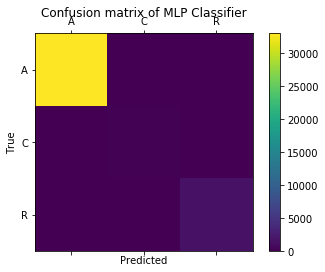

In [18]:

labels = ['A', 'C', 'R']
cm = confusion_matrix(mlp_y_test, mlp_pred, labels)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of MLP Classifier')

fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Unsupervised Learning: K-Means Clustering

In [19]:
#Define dataset for clustering
km_df = audit[['package_id', 'net_weight', 'ext_printed', 'gross_weight',
               'audit_reject_reasonid', 'orig_tare_weight', 'orig_net_weight',
               'time_delta', 'Material', 'label', 'image', 'audited']
]
km_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116557 entries, 0 to 116556
Data columns (total 12 columns):
package_id               116557 non-null int64
net_weight               116557 non-null float64
ext_printed              116557 non-null float64
gross_weight             116557 non-null float64
audit_reject_reasonid    116557 non-null int64
orig_tare_weight         116557 non-null float64
orig_net_weight          116557 non-null float64
time_delta               116557 non-null float64
Material                 116557 non-null int64
label                    116557 non-null int64
image                    116557 non-null int64
audited                  116557 non-null int64
dtypes: float64(6), int64(6)
memory usage: 10.7 MB


### Supervised Learning Model: Labeled Output (Y)

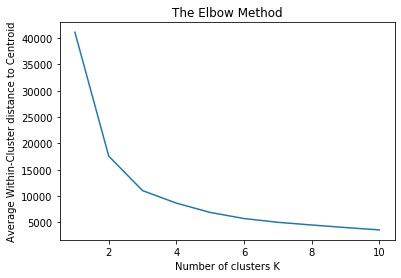

In [20]:
#Define dataset for clustering
KM_X = audit[['package_id', 'net_weight', 'ext_printed', 'gross_weight',
               'audit_reject_reasonid', 'orig_tare_weight', 'orig_net_weight',
               'time_delta', 'Material', 'label', 'image']
]

y = audit['audit_status']

# Normalize the data because of the variance in the features
KM_X_norm = normalize(KM_X)

# Using the elbow method to find  the optimal number of clusters
ks = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
  kmeans.fit(KM_X_norm)
  ks.append(kmeans.inertia_)
plt.plot(range(1, 11),ks)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('Average Within-Cluster distance to Centroid')  
plt.show()

In [21]:
# Calculate predicted values.
km6_y_pred = KMeans(n_clusters=6, random_state=42).fit_predict(KM_X_norm)

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(round(pd.crosstab(km6_y_pred, y, normalize = 'index'),4))



Comparing k-means clusters against the data:
audit_status       A       C       R
row_0                               
0             0.9429  0.0133  0.0438
1             0.9700  0.0086  0.0214
2             0.9727  0.0108  0.0165
3             0.9621  0.0032  0.0346
4             0.8400  0.0057  0.1544
5             0.9068  0.0090  0.0842


In [22]:
# Calculate predicted values.
km3_y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(KM_X_norm)

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(round(pd.crosstab(km3_y_pred, y, normalize = 'index'),4))


Comparing k-means clusters against the data:
audit_status       A       C       R
row_0                               
0             0.8838  0.0083  0.1078
1             0.9574  0.0063  0.0363
2             0.9709  0.0089  0.0202


### Unsupervised Model: K-Means with No Labeled Output

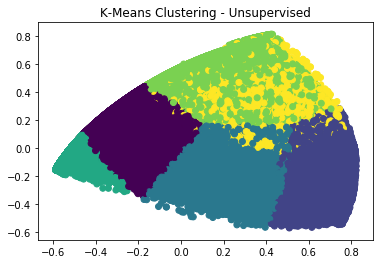

Comparing k-means clusters against the data:
audit_status       A       C       R
row_0                               
0             0.9431  0.0132  0.0437
1             0.9700  0.0086  0.0214
2             0.9726  0.0108  0.0165
3             0.9620  0.0033  0.0347
4             0.8399  0.0057  0.1545
5             0.9067  0.0090  0.0842
Processing time: 12.2542 seconds


In [23]:
#Measure time performance
kmu_start = time.time()

#Define dataset for clustering
KMu_X = km_df[['package_id', 'net_weight', 'ext_printed', 'gross_weight',
               'audit_reject_reasonid', 'orig_tare_weight', 'orig_net_weight',
               'time_delta', 'Material', 'label', 'image', 'audited']
             ]

# Normalize the data because of the variance in the features
KMu_X_norm = normalize(KMu_X)

# Reduce it to two components.
KMu_X_pca = PCA(2).fit_transform(KMu_X_norm)

# Calculate predicted values.
kmu_y_pred = KMeans(n_clusters=6, random_state=42).fit_predict(KMu_X_norm)

#Plot the solution.
plt.scatter(KMu_X_pca[:, 0], KMu_X_pca[:, 1], c=kmu_y_pred)
plt.title('K-Means Clustering - Unsupervised')
plt.savefig('k_means_nolabels_6clusters_imbalanced.png')
plt.show()

#Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(round(pd.crosstab(kmu_y_pred, y, normalize = 'index'),4))

print("Processing time: %s seconds" % round((time.time() - kmu_start), 4))

In [24]:
# # Note: the itertools module is tons of fun and very useful.
# import itertools

# # Create a list of pairs, where each pair is the ground truth group
# # and the assigned cluster.
# c = list(itertools.product(kmu_y_pred, y))

# # Count how often each type of pair (a, b, c, or d) appears.
# RIcounts = [[x, c.count(x)] for x in set(c)]
# print(RIcounts)

# # Create the same counts but without the label, for easier math below.
# RIcounts_nolabel = [c.count(x) for x in set(c)]

# # Calculate the Rand Index.
# RIscore = (RIcounts_nolabel[3] + RIcounts_nolabel[2]) / np.sum(RIcounts_nolabel)
# print(RIscore)

### Unsupervised Model: Mean Shift with No Labeled Output

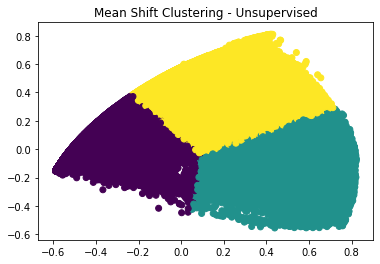

Number of estimated clusters: 3
Comparing the assigned categories to the ones in the data:
col_0         0       1       2
audited                        
1        0.4976  0.3132  0.1893
2        0.3632  0.1184  0.5184
3        0.4151  0.3836  0.2013
Processing time: 4.5423 seconds


In [25]:
#Measure time performance
mshift_start = time.time()

#Define dataset for clustering
Mshift_X = km_df[['package_id', 'net_weight', 'ext_printed', 'gross_weight',
               'audit_reject_reasonid', 'orig_tare_weight', 'orig_net_weight',
               'time_delta', 'Material', 'label', 'image', 'audited']
             ]

mshift_y = km_df['audited']

# Normalize the data because of the variance in the features
Mshift_X_norm = normalize(Mshift_X)

# Reduce it to two components.
Mshift_X_pca = PCA(2).fit_transform(Mshift_X_norm)

#Divide into training and test sets.
MS_X_train, MS_X_test, ms_y_train, ms_y_test = train_test_split(
    Mshift_X_pca,
    mshift_y,
    test_size=0.8,
    random_state=42)

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(MS_X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(MS_X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

#Plot the solution.
plt.scatter(MS_X_train[:,0], MS_X_train[:,1], c=labels)
plt.title('Mean Shift Clustering - Unsupervised')
plt.savefig('mean-shift_labeled_imbalanced.png')
plt.show()


print("Number of estimated clusters: {}".format(n_clusters_))

#Check the solution against the data.
print('Comparing the assigned categories to the ones in the data:')
print(round(pd.crosstab(ms_y_train,labels, normalize = 'index'),4))

print("Processing time: %s seconds" % round((time.time() - mshift_start), 4))


### Unsupervised Model: Spectral Clustering with No Labeled Output

In [26]:
# #Measure time performance
# scshift_start = time.time()


# # From Mean Split we know we're looking for 3 clusters.
# n_clusters=3

# #create a smaller dataset to processing 
# SC_X_train, SC_X_test, sc_y_train, sc_y_test = train_test_split(
#     Mshift_X_pca,
#     mshift_y,
#     test_size=0.2,
#     random_state=42)


# # Declare and fit the model.
# sc = SpectralClustering(n_clusters=n_clusters)
# sc.fit(SC_X_train)

# #Predicted clusters.
# scpredict=sc.fit_predict(SC_X_train)

# #Graph results.
# plt.scatter(SC_X_train[:, 0], SC_X_train[:, 1], c=scpredict) 
# plt.title('Spectral Clustering - Unsupervised')
# plt.savefig('spectral_cluster_imbalanced.png')
# plt.show()

# print('Comparing the assigned categories to the ones in the data:')
# print(pd.crosstab(sc_y_train,predict))

# print("Processing time: %s seconds" % round((time.time() - schift_start), 4))


In [27]:
#Define dataset for clustering
KMu_X = km_df[['package_id', 'net_weight', 'ext_printed', 'gross_weight',
               'audit_reject_reasonid', 'orig_tare_weight', 'orig_net_weight',
               'time_delta', 'Material', 'label', 'image']
             ]

y = audit['audited']

# Normalize the data because of the variance in the features
KMu_X_norm = normalize(KMu_X)

#Reduce it to two components.
KMu_X_pca = PCA(2).fit_transform(KMu_X_norm)

# Calculate predicted values.
kmu_y_pred = KMeans(n_clusters=6, random_state=42).fit_predict(KMu_X_pca)

In [28]:
#define the function for sampling data for the plot
def plot_resampling(KMu_X_pca, y, sampling, ax):
    X_res, y_res = sampling.fit_resample(KMu_X_pca, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor='k')
    # make nice plotting
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    return Counter(y_res)

In [29]:
#define the decision function for setting the grid boundaries
def plot_decision_function(KMu_X_pca, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = KMu_X_pca[:, 0].min() - 1, KMu_X_pca[:, 0].max() + 1
    y_min, y_max = KMu_X_pca[:, 1].min() - 1, KMu_X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(KMu_X_pca[:, 0], KMu_X_pca[:, 1], alpha=0.8, c=y, edgecolor='k')

Processing time: 13.0993 seconds


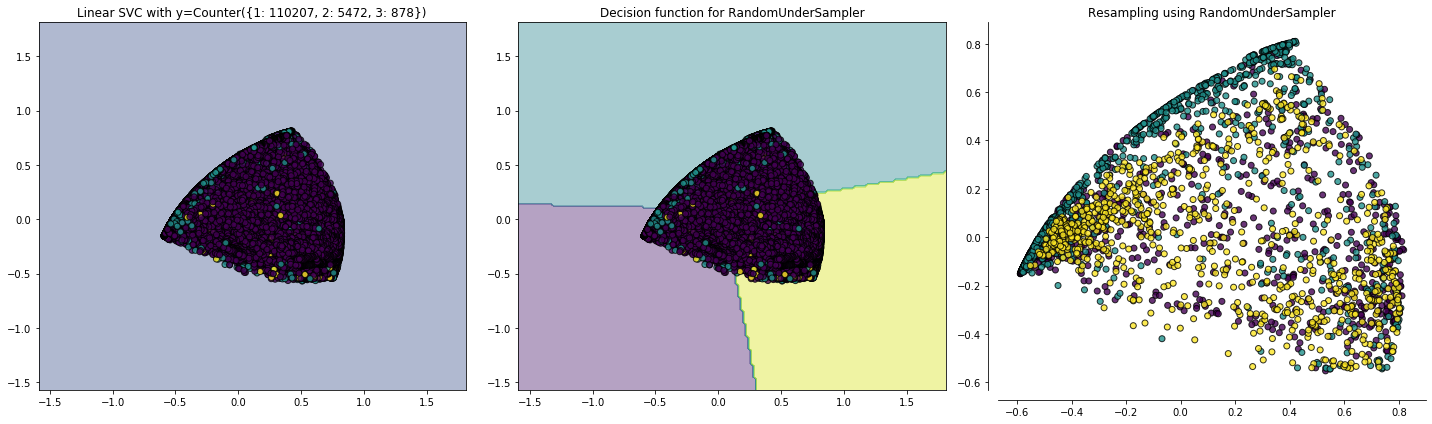

In [30]:
#Re-run Unsupervised K means model but now adjust for imbalanced data

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from collections import Counter
from sklearn.svm import LinearSVC

#Measure time performance
kmu_start = time.time()

#Set the plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

clf = LinearSVC().fit(KMu_X_pca, y)
plot_decision_function(KMu_X_pca, y, clf, ax1)
ax1.set_title('Linear SVC with y={}'.format(Counter(y)))
sampler = RandomUnderSampler(sampling_strategy = 'not minority', random_state=0)
clf = make_pipeline(sampler, LinearSVC())
clf.fit(KMu_X_pca, y)
plot_decision_function(KMu_X_pca, y, clf, ax2)
ax2.set_title('Decision function for {}'.format(sampler.__class__.__name__))
plot_resampling(KMu_X_pca, y, sampler, ax3)
ax3.set_title('Resampling using {}'.format(sampler.__class__.__name__))

fig.tight_layout()

plt.savefig('Test_for_imbalanceddata_randomsampler.png')

#Plot the solution.
# plt.scatter(KMu_X_norm[:, 0], KMu_X_pca[:, 1], c=kmu_y_pred)
# plt.show()

print("Processing time: %s seconds" % round((time.time() - kmu_start), 4))

After running the data through several different iterations of K-Means and an MLP classifier, the results indicate that the data may be imbalanced.  The last test applied a random undersampler to test if such was the case and the last graph shows an improvement in the clustering after undersampling occurred.  Let's re-run the models with a more balanced dataset. 

In [31]:
#import the function 
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

#define the parameters for
smote_enn = SMOTEENN(random_state=0)
smote_tomek = SMOTETomek(random_state=0)

#fit the sampling models
X_resampled, y_resampled = smote_enn.fit_resample(MS_X_train, ms_y_train)
print('SMOTEENN dataset:',sorted(Counter(y_resampled).items()))

X_resampled, y_resampled = smote_tomek.fit_resample(MS_X_train, ms_y_train)
print('SMOTETomek dataset:',sorted(Counter(y_resampled).items()))


SMOTEENN dataset: [(1, 12557), (2, 16202), (3, 16891)]
SMOTETomek dataset: [(1, 20038), (2, 20630), (3, 21063)]


In [32]:
#define the function for sampling data for the plot
def plot_resampling(X, y, sampling, ax):
    X_res, y_res = sampling.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor='k')
    # make nice plotting
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    return Counter(y_res)

In [33]:
#define the decision function for setting the grid boundaries
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

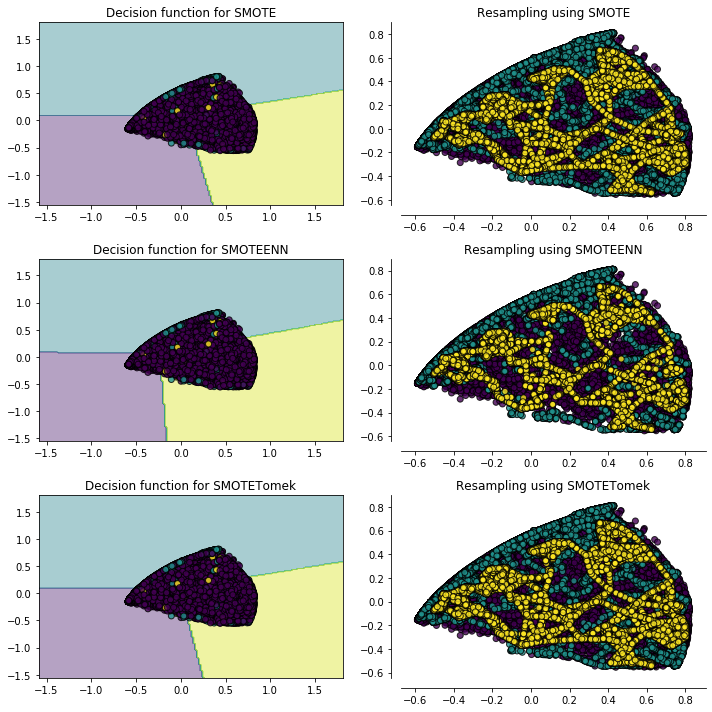

In [37]:
#Plot the comparisions between the linear SVC function on imbalanced data and clusting on balanced data
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax_arr = ((ax1, ax2), (ax3, ax4), (ax5, ax6))
for ax, sampler in zip(ax_arr, (
        SMOTE(random_state=0),
        SMOTEENN(random_state=0),
        SMOTETomek(random_state=0))):
    clf = make_pipeline(sampler, LinearSVC())
    clf.fit(MS_X_train, ms_y_train)
    plot_decision_function(MS_X_train, ms_y_train, clf, ax[0])
    ax[0].set_title('Decision function for {}'.format(
        sampler.__class__.__name__))
    plot_resampling(MS_X_train, ms_y_train, sampler, ax[1])
    ax[1].set_title('Resampling using {}'.format(
        sampler.__class__.__name__))
fig.tight_layout()

plt.savefig('Plot_for_testing_imbalanceddata_smote.png')
plt.show()